<a href="https://colab.research.google.com/github/gyuseonge-chae/bigdata-machinelearning/blob/main/NYATS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df2003 = pd.read_csv('/content/drive/MyDrive/nyats_team_mlproject/nyats2003_2.csv')
df2003.head()

,Unnamed: 0,b7,f1,d5a,d5b,d5c,d5d,d5e,d5f,income,child,Y
0,1,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
1,3,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1
2,4,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
4,6,17.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [ ]:
df2003.value_counts()

Unnamed: 0  b7    f1   d5a  d5b  d5c  d5d  d5e  d5f  income  child  Y
1           18.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     1.0    0    1
24065       18.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0     2.0    0    1
24063       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     1.0    0    1
24062       21.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     1.0    1    1
24061       18.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0     1.0    0    1
                                                                        ..
11597       14.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     1.0    1    1
11596       18.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     2.0    1    1
11595       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     2.0    0    1
11594       18.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0    0    1
36781       20.0  2.0  1.0  2.0  2.0  2.0  2.0  1.0  1.0     2.0    0    1
Length: 27379, dtype: int64

In [ ]:
df2003.isnull().sum()

Unnamed: 0    0
b7            0
f1            0
d5a           0
d5b           0
d5c           0
d5d           0
d5e           0
d5f           0
income        0
child         0
Y             0
dtype: int64

In [ ]:
X = df2003.loc[:, ['b7', 'f1', 'd5a', 'd5c', 'd5b', 'd5d', 'd5e', 'd5f','income', 'child']]
y = df2003.loc[:, 'Y']
X.isnull().sum()

b7        0
f1        0
d5a       0
d5c       0
d5b       0
d5d       0
d5e       0
d5f       0
income    0
child     0
dtype: int64

In [ ]:
X

,b7,f1,d5a,d5c,d5b,d5d,d5e,d5f,income,child
0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,17.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
27374,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
27375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
27376,14.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
27377,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# xgboost model 구축 시작

from hyperopt import hp, STATUS_OK, fmin, tpe, Trials

    # 하이퍼 파라미터 튜닝 hyperopt 사용

        # 검색 공간 설정
xgb_search_space = {
    'max_depth': hp.quniform("max_depth", 3, 12, 1), # max_depth는 정수를 받으므로 추후 형변환할것
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),   # 형변환 필요
    'learning_rate': hp.uniform('learning_rate', 0.1, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
    'min_split_loss': hp.uniform ('min_split_loss', 1, 9),
    'alpha' : hp.uniform('alpha', 0.001, 0.1)
}


        # 목적 함수 설정
            # 수행 시간 절약을 위해 estimator를 축소시킴
def objective_func(search_space):
    xgb_clf = XGBClassifier(
                            n_estimators=200,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            subsample=search_space['subsample'],
                            colsample_bytree=search_space['colsample_bytree'],
                            min_split_loss=search_space['min_split_loss'],
                            alpha=search_space['alpha']
)

    scores = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=5)

    return {'loss':np.mean(scores), 'status': STATUS_OK}


        # 평가 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  print('MSE: ', mse)
  print('R2 score: ', r2)
  print('오차행렬: ' ,confusion)
  sns.heatmap(confusion, annot=True, fmt='g')


        # fmin 함수
trial_val = Trials()     # 입력 결과를 저장할 객체 생성
best = fmin(
            fn=objective_func,   # 목적 함수
            space=xgb_search_space,   # 검색 공간
            algo=tpe.suggest,    # 베이지안 최적화 적용 알고리즘
            max_evals=20,   # 입력 시도 횟수
            trials=trial_val,     # 시도한 입력 값 및 입력 결과 저장
            rstate=np.random.default_rng(seed=9)
)
print('best hyper parameters:', best)

100%|██████████| 20/20 [03:36<00:00, 10.84s/trial, best loss: 0.8480767527146478]
best hyper parameters: {'alpha': 0.08078086071883926, 'colsample_bytree': 0.6322575524212228, 'learning_rate': 0.2805929442114381, 'max_depth': 10.0, 'min_child_weight': 6.0, 'min_split_loss': 1.356574232004804, 'subsample': 0.8265242569420322}


[0]	validation_0-auc:0.86403	validation_1-auc:0.87006
[1]	validation_0-auc:0.90144	validation_1-auc:0.90559
[2]	validation_0-auc:0.90478	validation_1-auc:0.90737
[3]	validation_0-auc:0.90494	validation_1-auc:0.90830
[4]	validation_0-auc:0.90861	validation_1-auc:0.91111
[5]	validation_0-auc:0.90755	validation_1-auc:0.91036
[6]	validation_0-auc:0.90849	validation_1-auc:0.91137
[7]	validation_0-auc:0.90869	validation_1-auc:0.91122
[8]	validation_0-auc:0.91170	validation_1-auc:0.91412
[9]	validation_0-auc:0.91426	validation_1-auc:0.91535
[10]	validation_0-auc:0.91472	validation_1-auc:0.91575


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.91579	validation_1-auc:0.91584
[12]	validation_0-auc:0.91570	validation_1-auc:0.91581
[13]	validation_0-auc:0.91642	validation_1-auc:0.91600
[14]	validation_0-auc:0.91673	validation_1-auc:0.91608
[15]	validation_0-auc:0.91690	validation_1-auc:0.91591
[16]	validation_0-auc:0.91759	validation_1-auc:0.91607
[17]	validation_0-auc:0.91762	validation_1-auc:0.91592
[18]	validation_0-auc:0.91796	validation_1-auc:0.91616
[19]	validation_0-auc:0.91798	validation_1-auc:0.91612
[20]	validation_0-auc:0.91817	validation_1-auc:0.91612
[21]	validation_0-auc:0.91834	validation_1-auc:0.91604
[22]	validation_0-auc:0.91889	validation_1-auc:0.91582
[23]	validation_0-auc:0.91902	validation_1-auc:0.91592
[24]	validation_0-auc:0.91913	validation_1-auc:0.91586
[25]	validation_0-auc:0.91941	validation_1-auc:0.91565
[26]	validation_0-auc:0.91978	validation_1-auc:0.91566
[27]	validation_0-auc:0.91983	validation_1-auc:0.91583
[28]	validation_0-auc:0.91979	validation_1-auc:0.91580
[29]	valid

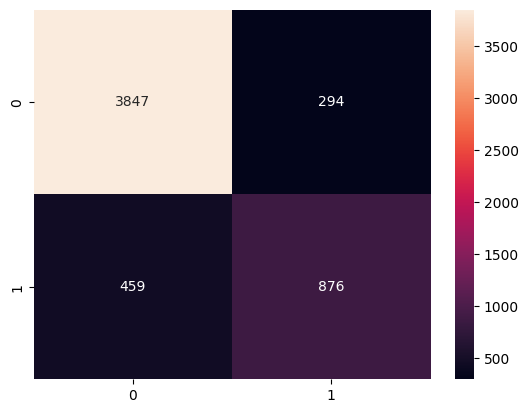

In [ ]:
# xgb 모델 선언
xgb_wrapper = XGBClassifier(
                            n_estimators=300,
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            learning_rate=best['learning_rate'],
                            subsample=best['subsample'],
                            colsample_bytree=best['colsample_bytree'],
                            min_split_loss=best['min_split_loss'],
                            alpha=best['alpha']
)

evals = [(X_train, y_train), (X_val, y_val)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=15, eval_metric='auc', eval_set=evals, verbose=1)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

In [ ]:
# 의사 결정 트리 시각화

%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 300, 300

# 의사 결정 트리 시각화
plot_tree(xgb_wrapper, max_depth=3)
plt.show()

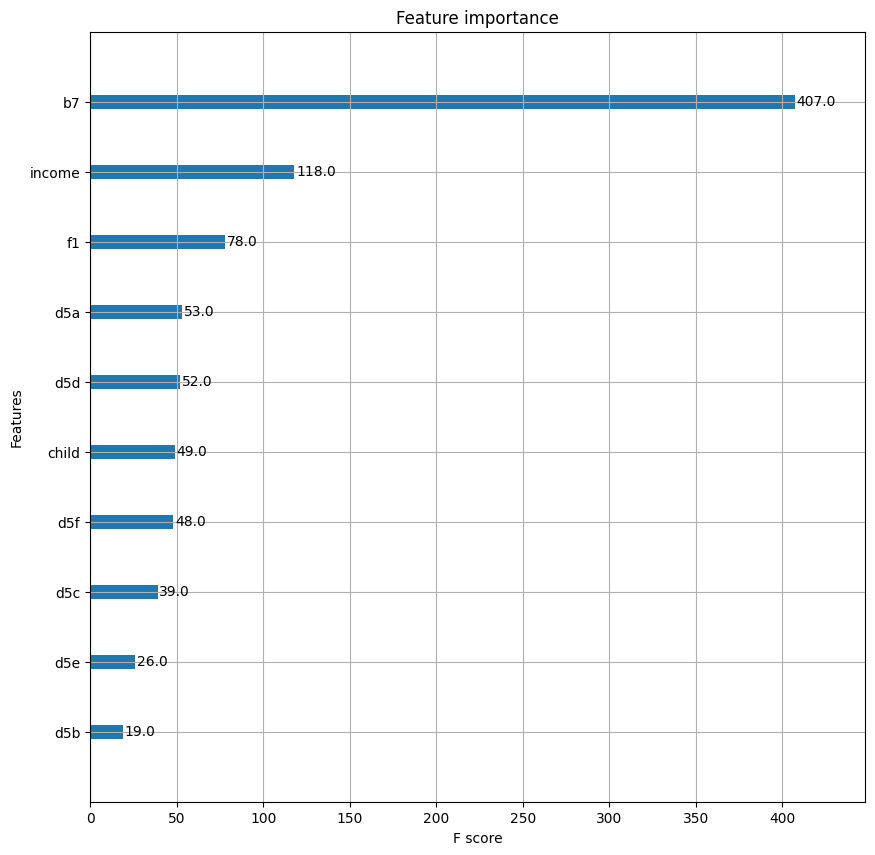

In [ ]:
# feature 중요도 시각화

from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10
plot_importance(xgb_wrapper)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
!pip install pdpbox
from pdpbox import pdp, info_plots

# 예측 plot
predict_f1 = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    feature="f1",
    feature_name="f1",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_f1.plot(
    figsize=(1000,1500),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.5 MB/s eta 0:00:00
obtain pred_func from the provided model.


In [ ]:
# 실제 plot
target_f1 = info_plots.TargetPlot(
    df=df2003,
    feature="f1",
    feature_name="f1",
    target=df2003.columns[11]
)

fig, axes, summary_df = target_f1.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# income에 대한 예측 plot
predict_income = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    feature="income",
    feature_name="income",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_income.plot(
    figsize=(1000,1500),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

obtain pred_func from the provided model.


In [ ]:
# income에 대한 예측 plot
target_income = info_plots.TargetPlot(
    df=df2003,
    feature="income",
    feature_name="income",
    target=df2003.columns[11]
)

fig, axes, summary_df = target_income.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# b7에 대한 예측 plot
predict_b7 = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    feature="b7",
    feature_name="b7",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_b7.plot(
    figsize=(1000,1500),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

obtain pred_func from the provided model.


In [ ]:
# b7에 대한 예측 plot
target_b7 = info_plots.TargetPlot(
    df=df2003,
    feature="b7",
    feature_name="b7",
    target=df2003.columns[11]
)

fig, axes, summary_df = target_b7.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# feature간 관계 표시
target_f1_b7 = info_plots.InteractTargetPlot(
    df=df2003,
    features=["f1", "b7"],
    feature_names=["f1", "b7"],
    target=df2003.columns[11],
    num_grid_points=20,
    grid_types="percentile",
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
)
fig, axes, summary_df = target_f1_b7.plot(
    show_percentile=True,
    figsize=(800, 900),
    annotate=True,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# 등고선 형태

pdp_f1_b7 = pdp.PDPInteract(
    model=xgb_wrapper,
    df=df2003,
    model_features=X_train.columns,
    features=["f1", "b7"],
    feature_names=["f1", "b7"],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None
)

obtain pred_func from the provided model.


  0%|          | 0/4 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
fig, axes = pdp_f1_b7.plot(
    plot_type='contour',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
pdp_b7_income = pdp.PDPInteract(
    model=xgb_wrapper,
    df=df2003,
    model_features=X_train.columns,
    features=["b7", "income"],
    feature_names=["b7", "income"],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
)

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/4 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
fig, axes = pdp_b7_income.plot(
    plot_type="grid",
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# ligthgbm model 구축 시작
from lightgbm import early_stopping

    # 하이퍼 파라미터 튜닝

        # 검색 공간 설정 (정수 파라미터들은 추후 정수형변환 필요)
lgbm_search_space = {
                    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
                    'max_depth':  hp.quniform('max_depth', 3, 10, 1),
                    'num_leaves':  hp.quniform('num_leaves', 8, 600, 4),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0)
}

        # 목적 함수
def objective_func(search_space):
    params = {
        'boosting_type': search_space['boosting_type'],
        'num_leaves': int(search_space['num_leaves']),
        'max_depth': int(search_space['max_depth']),
        'colsample_bytree': search_space['colsample_bytree'],
    }

    lgbm_clf = LGBMClassifier(
                            objetive = 'binary',
                            metric ='auc',
                            n_estimators=200,
                            **params,
                            callbacks=[early_stopping(stopping_rounds=5)],
                            random_state=42
    )

    scores = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3)

    return {'loss':np.mean(scores) * 100, 'status': STATUS_OK}


        # fmin
trial_val = Trials()
best = fmin(
            fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=20,
            trials= trial_val,
            rstate=np.random.default_rng(seed=9)
)

print('best hyper parameters:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 4230, number of negative: 13292
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 17522, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241411 -> initscore=-1.144960
[LightGBM] [Info] Start training from score -1.144960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

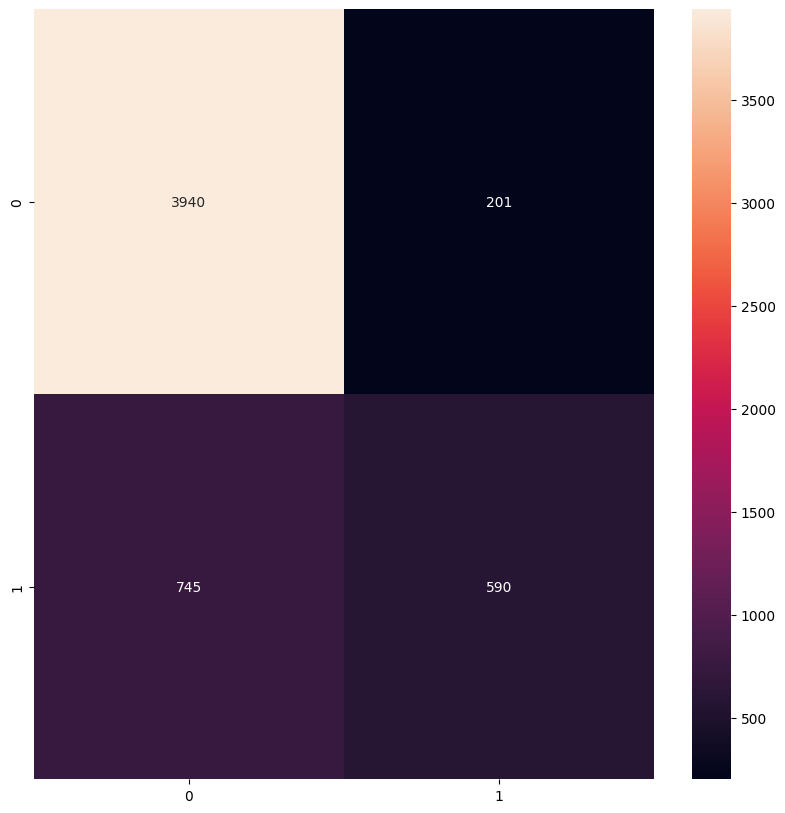

In [ ]:
from lightgbm import early_stopping

lgbm_wrapper = LGBMClassifier(
                              boosting_type='gbdt',
                              n_estimators=200,
                              max_depth=int(best['max_depth']),
                              num_leaves=int(best['num_leaves']),
                              colsample_bytree=best['colsample_bytree'],
                              random_state=42
)

evals = [(X_train, y_train), (X_val, y_val)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='auc', eval_set=evals, callbacks=[early_stopping(stopping_rounds=5)])

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

In [ ]:
# 의사 결정 트리 시각화

from lightgbm import plot_tree

rcParams['figure.figsize'] = 300, 300

# 의사 결정 트리 시각화
plot_tree(lgbm_wrapper)
plt.show()